In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel("/content/Crude Oil Prices Daily.xlsx")

In [3]:
data.head()

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [4]:
data.tail()

,Date,Closing Value
8218,2018-07-03,74.19
8219,2018-07-04,NaN
8220,2018-07-05,73.05
8221,2018-07-06,73.78
8222,2018-07-09,73.93


In [5]:
data.describe()

,Closing Value
count,8216.000000
mean,43.492139
std,29.616804
min,10.250000
25%,19.577500
50%,29.610000
75%,63.402500
max,145.310000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8223 non-null   datetime64[ns]
 1   Closing Value  8216 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 128.6 KB


In [7]:
data.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [8]:
data.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [9]:
data.dropna(axis=0,inplace=True)

In [10]:
data.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [11]:
data.shape

(8216, 2)

In [12]:
import tensorflow as tf

In [13]:
tf.__version__

'2.9.2'

In [14]:
import tensorflow.keras

In [15]:
tensorflow.keras.__version__

'2.9.0'

In [16]:
data_oil=data.reset_index()['Closing Value']

In [17]:
data_oil

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

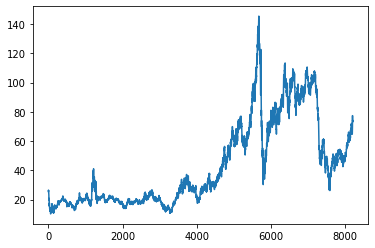

In [18]:
plt.plot(data_oil)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_oil=scaler.fit_transform(np.array(data_oil).reshape(-1,1))

In [20]:
print(data_oil)

[[0.11335703]
 [0.11661484]
 [0.12053902]
 ...
 [0.46497853]
 [0.47038353]
 [0.47149415]]


In [21]:
training_size=int(len(data_oil)*0.65)
test_size=len(data_oil)-training_size
train_data,test_data=data_oil[0:training_size,:],data_oil[training_size:len(data_oil),:1]

In [22]:
training_size,test_size

(5340, 2876)

In [23]:
train_data

array([[0.11335703],
       [0.11661484],
       [0.12053902],
       ...,
       [0.37916482],
       [0.38153413],
       [0.38294092]])

In [24]:
train_data.shape

(5340, 1)

In [25]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [26]:
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [27]:
print(X_train.shape), print(y_train.shape)

(5329, 10)
(5329,)


(None, None)

In [28]:
print(X_test.shape), print(ytest.shape)

(2865, 10)
(2865,)


(None, None)

In [29]:
X_train

array([[0.11335703, 0.11661484, 0.12053902, ..., 0.10980305, 0.1089886 ,
        0.11054346],
       [0.11661484, 0.12053902, 0.11550422, ..., 0.1089886 , 0.11054346,
        0.10165852],
       [0.12053902, 0.11550422, 0.1156523 , ..., 0.11054346, 0.10165852,
        0.09906708],
       ...,
       [0.36731823, 0.35176958, 0.36080261, ..., 0.36391234, 0.37042796,
        0.37042796],
       [0.35176958, 0.36080261, 0.35354657, ..., 0.37042796, 0.37042796,
        0.37879461],
       [0.36080261, 0.35354657, 0.35295424, ..., 0.37042796, 0.37879461,
        0.37916482]])

In [30]:
y_train

array([0.10165852, 0.09906708, 0.08203761, ..., 0.37879461, 0.37916482,
       0.38153413])

In [31]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [33]:
model=Sequential()

In [34]:
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))

In [35]:
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
84/84 [==============================] - 9s 40ms/step - loss: 0.0020 - val_loss: 8.7428e-04
Epoch 2/50
84/84 [==============================] - 3s 34ms/step - loss: 1.2906e-04 - val_loss: 9.7198e-04
Epoch 3/50
84/84 [==============================] - 2s 24ms/step - loss: 1.3405e-04 - val_loss: 8.3595e-04
Epoch 4/50
84/84 [==============================] - 2s 23ms/step - loss: 1.3458e-04 - val_loss: 9.5025e-04
Epoch 5/50
84/84 [==============================] - 2s 24ms/step - loss: 1.3178e-04 - val_loss: 0.0013
Epoch 6/50
84/84 [==============================] - 2s 23ms/step - loss: 1.2320e-04 - val_loss: 9.1236e-04
Epoch 7/50
84/84 [==============================] - 2s 23ms/step - loss: 1.2059e-04 - val_loss: 8.2458e-04
Epoch 8/50
84/84 [==============================] - 2s 24ms/step - loss: 1.1767e-04 - val_loss: 0.0015
Epoch 9/50
84/84 [==============================] - 2s 23ms/step - loss: 1.2146e-04 - val_loss: 8.7567e-04
Epoch 10/50
84/84 [==============================

In [38]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

90/90 [==============================] - 0s 5ms/step


In [39]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [40]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

28.896409109840192

In [41]:
math.sqrt(mean_squared_error(ytest,test_predict))

76.6144884816687

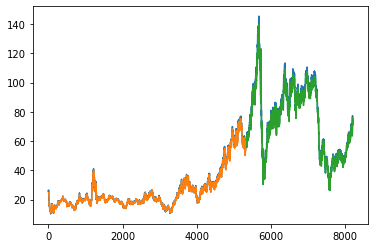

In [42]:
look_back=10
trainPredictPlot = np.empty_like(data_oil)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data_oil)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data_oil)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data_oil))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [43]:
model.save("crude-oil.h5")

In [44]:
len(test_data)


2876

In [45]:
x_input=test_data[2866:].reshape(1,-1)
x_input.shape

(1, 10)

In [46]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [47]:
temp_input

[0.44172960165852215,
 0.48111950244335855,
 0.49726047682511476,
 0.4679401747371539,
 0.4729749740855915,
 0.47119798608026064,
 0.47341922108692425,
 0.4649785280616022,
 0.4703835332444839,
 0.47149415074781587]

In [48]:
len(temp_input)

10

In [49]:
from numpy import array
lst_output=[]
n_steps=10
i=0
while(i<10):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[0.45995975]
11
1 day input [0.4811195  0.49726048 0.46794017 0.47297497 0.47119799 0.47341922
 0.46497853 0.47038353 0.47149415 0.45995975]
1 day output [[0.4491191]]
2 day input [0.49726048 0.46794017 0.47297497 0.47119799 0.47341922 0.46497853
 0.47038353 0.47149415 0.45995975 0.44911909]
2 day output [[0.43676093]]
3 day input [0.46794017 0.47297497 0.47119799 0.47341922 0.46497853 0.47038353
 0.47149415 0.45995975 0.44911909 0.43676093]
3 day output [[0.4243545]]
4 day input [0.47297497 0.47119799 0.47341922 0.46497853 0.47038353 0.47149415
 0.45995975 0.44911909 0.43676093 0.42435449]
4 day output [[0.4130903]]
5 day input [0.47119799 0.47341922 0.46497853 0.47038353 0.47149415 0.45995975
 0.44911909 0.43676093 0.42435449 0.41309029]
5 day output [[0.40322617]]
6 day input [0.47341922 0.46497853 0.47038353 0.47149415 0.45995975 0.44911909
 0.43676093 0.42435449 0.41309029 0.40322617]
6 day output [[0.3948413]]
7 day input [0.46497853 0.47038353 0.47149415 0.45995975 0.44911909 0.

In [50]:
day_new=np.arange(1,11)
day_pred=np.arange(11,21)

In [51]:
len(data_oil)

8216

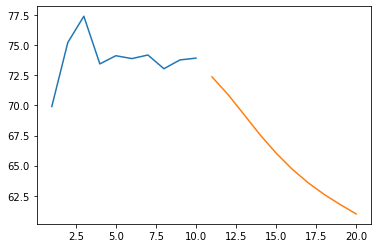

In [52]:
plt.plot(day_new,scaler.inverse_transform(data_oil[8206:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

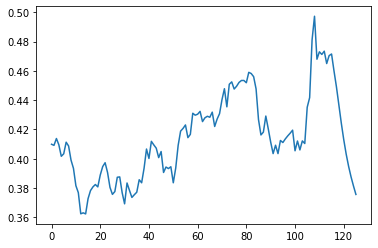

In [53]:
df3=data_oil.tolist()
df3.extend(lst_output)
plt.plot(df3[8100:])

In [54]:
df3=scaler.inverse_transform(df3).tolist()

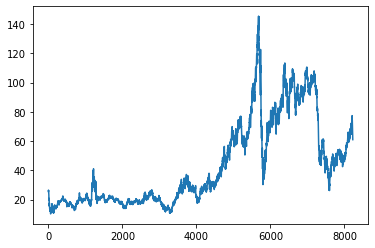

In [55]:
plt.plot(df3)